In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = sns.load_dataset("mpg")

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_pred)
y_pred = np.round(y_pred)
df.loc[X_pred.index, "horsepower"] = y_pred
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [4]:
X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [5]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [85]:
class ERegressor:
    def __init__(self, n = 100, hidden_layers = False, activation = "sigmoid", random_state = None, verbose = 0):

        self.n = n // 2 * 2
        self.nets = []
        self.best_net = -1
        self.best_result = None
        self.mutation_sigma = 0

        if activation == "sigmoid":
            self.activation_function = np.vectorize(lambda x: 1 / (1 + math.exp(-x)))
        elif activation == "relu":
            self.activation_function = lambda x: np.maximum(0, x)
        
        if hidden_layers:
            self.layers = hidden_layers + [1]
        else:
            self.layers = [1]
        
        if random_state != None:
            np.random.seed(random_state)

        self.verbose = verbose

    
    def fit(self, X_train, y_train, epochs = 100):
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]

        self.layers = [X_train.shape[1]] + self.layers

        self.nets_loss = np.zeros(self.n)

        self.weights = []

        for i in range(len(self.layers) - 1):
            self.weights += [np.random.uniform(-3, 3, (self.n, self.layers[i], self.layers[i + 1]))]

        for epoch in range(epochs):
            forward_pass = X_train.T
            
            for j in range(0, len(self.layers) - 2):
                forward_pass = self.activation_function(self.weights[j].transpose(0, 2, 1) @ forward_pass)

            forward_pass = self.weights[-1].transpose(0, 2, 1) @ forward_pass
            y_pred = forward_pass.reshape(self.n, -1)

            for i in range(self.n):
                self.nets_loss[i] = mean_absolute_error(y_train, y_pred[i])

            self.sorted_indecies = np.argsort(regressor.nets_loss)

            self.mutation_sigma = 0.1 + 5 * 1 / math.exp(epoch / (epochs / 10))

            for j in range(0, len(self.layers) - 1):
                self.weights[j][self.sorted_indecies[50::2]] = (self.weights[j][self.sorted_indecies[:50:2]] + self.weights[j][self.sorted_indecies[1:51:2]]) / 2 + np.random.normal(0, self.mutation_sigma, (self.layers[j], self.layers[j + 1]))
                self.weights[j][self.sorted_indecies[51::2]] = (self.weights[j][self.sorted_indecies[:50:2]] + self.weights[j][self.sorted_indecies[1:51:2]]) / 2 + np.random.normal(0, self.mutation_sigma, (self.layers[j], self.layers[j + 1]))

            if self.best_net != self.sorted_indecies[0]:
                self.best_net = self.sorted_indecies[0]
                print(f"{epoch=}, {self.nets_loss[self.best_net]=}")


    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        forward_pass = X.T
        for j in range(0, len(self.layers) - 2):
            forward_pass = self.activation_function(self.nets[self.best_net][j].T @ forward_pass)

        forward_pass = self.nets[self.best_net][-1].T @ forward_pass

        return forward_pass.reshape(-1)
        

In [95]:
regressor = ERegressor(n = 100, hidden_layers = [10, 100], activation = "sigmoid", random_state = 42, verbose = 0)
regressor.fit(scaled_X_train, y_train, epochs = 1000)

epoch=0, self.nets_loss[self.best_net]=6.448957427134494
epoch=27, self.nets_loss[self.best_net]=6.306188548787827
epoch=43, self.nets_loss[self.best_net]=5.705525688873121


KeyboardInterrupt: 

In [93]:
a = np.arange(0, 100)

print(a[0:50:2])
print(a[1:51:2])

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]


In [72]:
regressor.sorted_indecies

array([30, 57, 64, 44, 65, 36, 99, 54, 37, 69, 14,  3, 97, 38, 41, 62, 80,
       84, 92, 81, 46, 85, 90, 60, 27, 52, 45, 56,  5,  7, 55, 39, 23, 58,
       34, 21, 95, 51, 59, 18, 22, 94, 12, 82, 10,  4, 72, 26, 74, 75,  8,
       29, 63, 15,  2,  6,  0, 31, 24, 53, 87, 78, 73, 42, 83, 48,  9, 71,
       33, 61, 19, 68, 47, 16, 70, 50, 67, 76, 17, 98, 25, 77, 91, 43, 96,
       28, 79, 35, 86, 93,  1, 66, 32, 88, 13, 40, 20, 89, 49, 11])

In [69]:
regressor.weights[1][regressor.sorted_indecies[1]].shape

(10, 1)

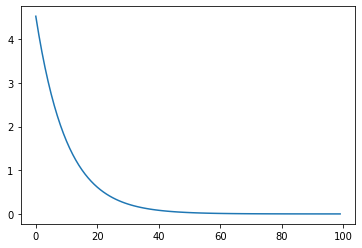

In [245]:
y = []
xrange = 100

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / 10)))

plt.plot(list(range(xrange)), y)

In [243]:
y_pred = regressor.predict(scaled_X_test)

In [244]:
mean_absolute_error(y_test, y_pred)

1.8509913997406002

In [361]:
activation_function = np.vectorize(lambda x: 1 / (1 + math.exp(-x)))

w = [np.array([[[0, 3],[2, 0]],[[1, 3],[9, 7]],[[5, 8],[3, 3]]]),
    np.array([[[2],[6]],[[0],[4]],[[6],[9]]])]
#w1 = np.array([[[0, 3],[2, 0]],[[1, 3],[9, 7]],[[5, 8],[3, 3]]])
#w2 = np.array([[[2],[6]],[[0],[4]],[[6],[9]]])

np.random.seed(42)

B = np.array([  [8, 0],
                [9, 2],
                [6, 3]])

pred = []

for i in range(3):
    forward_pass = B.T
    forward_pass = activation_function(w[0][i].T @ forward_pass)

    forward_pass = w[1][i].T @ forward_pass

    pred.append(forward_pass.reshape(-1))



In [363]:
pred

[array([7.        , 7.96402758, 7.99505466]),
 array([4., 4., 4.]),
 array([15., 15., 15.])]

In [364]:


forward_pass = B.T
forward_pass = activation_function(w[0].transpose(0, 2, 1) @ forward_pass)
forward_pass = w[1].transpose(0, 2, 1) @ forward_pass
pred = forward_pass.reshape(3, 3)


In [365]:
pred.reshape(3, 3)

array([[ 7.        ,  7.96402758,  7.99505466],
       [ 4.        ,  4.        ,  4.        ],
       [15.        , 15.        , 15.        ]])

In [309]:
w2.shape

(3, 2, 1)

In [279]:
pred

[array([48, 58, 42, 72, 93, 72]),
 array([56, 73, 57, 16, 26, 24]),
 array([32, 54, 51,  0, 10, 15])]

In [282]:
np.random.randint(0, 10, (2, 2, (1, 1)), dtype = "object")

TypeError: Unsupported dtype dtype('O') for randint